In [1]:
from sklearn.decomposition import FastICA
import scipy.io as scio
mat = scio.loadmat(file_name='connectome_features_100.mat')
connectome_features = mat['connectome_features']
task_index = mat['task_index']
task_label = mat['task_label']

In [2]:
task_label.shape

(1378, 1)

In [22]:
# normalize
from sklearn.preprocessing import StandardScaler
import numpy as np
x = connectome_features
x = StandardScaler().fit_transform(x)




3373209

In [10]:
from sklearn.decomposition import PCA
num_features = connectome_features.shape[1]
n_components = 128

ica = FastICA(n_components=n_components,max_iter=1000)
icaComponents = ica.fit_transform(x) 

In [21]:
ica1=icaComponents[:,0]
ica2=icaComponents[:,1]


In [14]:
def eval_metric(features,task_labels):
    from sklearn.metrics import silhouette_score
    silhouette_metric = silhouette_score(X=features,labels=task_labels.ravel(),metric='euclidean')
    return silhouette_metric

In [15]:
eval_metric(icaComponents,task_label)

-0.14027349369254863

In [16]:
def plot_tsne(features,task_labels):
    from sklearn.manifold import TSNE
    X_embedded = TSNE(n_components=2).fit_transform(features)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 

    targets = np.unique(task_labels)
    for target in targets:
        indicesToKeep = task_labels == target
        indicesToKeep = np.squeeze(indicesToKeep.T)
        ax.scatter(X_embedded[indicesToKeep.T,0]
                   , X_embedded[indicesToKeep.T,1]
                   , c = np.random.rand(3,))
    ax.grid()
    ax.legend(targets)
    return X_embedded

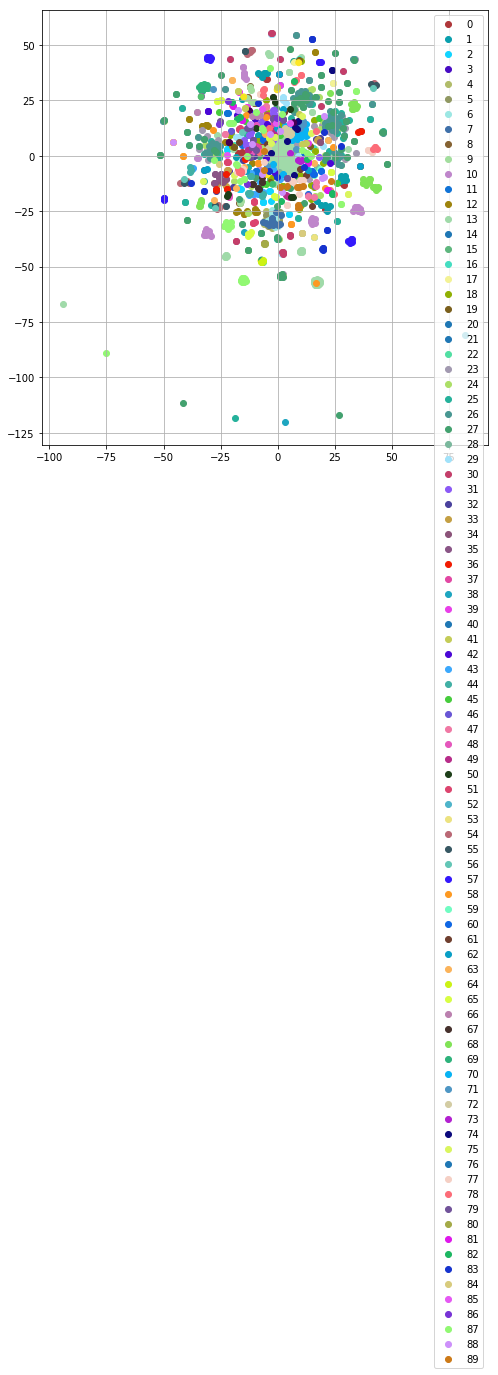

In [18]:
X_embedded = plot_tsne(icaComponents,task_label)

In [19]:
import scipy.io as scio
mat={}
mat['ica_features'] = icaComponents
mat['ica_tsne'] = X_embedded
scio.savemat(file_name='ica_features',mdict=mat)

In [24]:
X_embedded

array([[-23.904453  ,  -0.22268537],
       [ -7.9914246 , -10.194095  ],
       [ 17.400417  ,  20.544928  ],
       ...,
       [-10.352529  , -22.587317  ],
       [ -2.5961251 , -16.3108    ],
       [ -6.5297356 , -17.458672  ]], dtype=float32)

In [20]:
import pickle
pickle_out = open("ica_features.pickle","wb")
pickle.dump(icaComponents, pickle_out)
pickle.dump(X_embedded, pickle_out)
pickle.dump(ica, pickle_out)
pickle_out.close()